In [1]:
# se_f = "~/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/enrichment/annotation_clones/SE.rds"
# outdir = "~/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/enrichment/annotation_clones/DE_large"
# n_donors = 4

se_f = "/home/isshamie/data/Projects/Mito_Trace/output/pipeline/CHIP_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/annotation_clones/SE.rds"
outdir = "/home/isshamie/data/Projects/Mito_Trace/output/pipeline/CHIP_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/annotation_clones/DE_large"
n_donors = 5



# If more than 2 clones pass the cdf_thresh, use that, o.w use n_top_clones
cdf_thresh = 0.5
n_top_clones = 3

min_pct = 0.01
use_latent_vars = FALSE
genome = "/data/Mito_Trace/data/external/GRCh38_MT_blacklist/fasta/genome.fa"
cores=16
utils_script <- "/data/Mito_Trace/R_scripts/seurat_utils.R"

In [2]:
# Parameters
se_f = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/SE.rds"
outdir = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/DE_large"
n_donors = 4


In [3]:
if (use_latent_vars){
    latent.vars = "peaks_depth"
}else{
    latent.vars=NULL
}

In [4]:
source(utils_script)

Attaching SeuratObject



In [5]:
library(Seurat)
library(Signac)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)
plan("multiprocess", workers = cores)
#options(future.globals.maxSize = 50000 * 1024^2) # for 50 Gb RAM
options(future.globals.maxSize = 8000 * 1024^2)
library("ComplexHeatmap")


Attaching package: ‘cowplot’




The following object is masked from ‘package:patchwork’:

    align_plots





Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Warning message:
“Strategy 'multiprocess' is deprecated in future (>= 1.20.0). Instead, explicitly specify either 'multisession' or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


Loading required package: grid



ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




## Import seurat object

In [6]:
# if (file.exists(file.path(outdir, "se.chromvar.rds"))){
#     print("Loading se with chromvar")
#     se <- readRDS(file=file.path(outdir, "se.chromvar.rds"))    
# }else{
#     print("Running chromvar")
#     se = readRDS(se_f)
# #     source("~/data/Projects/Mito_Trace/R_scripts/addPWM.R")
#     se <- get.pwm(se, genome=genome)
#     saveRDS(object=se, file=file.path(outdir, "se.chromvar.rds"))    
# }

print("Running chromvar")
se = readRDS(se_f)
se <- get.pwm(se, genome=genome)
saveRDS(object=se, file=file.path(outdir, "se.chromvar.rds"))


# cells.meta = se[[]]
# cells.meta$name = paste0(cells.meta$donor,"_", cells.meta$lineage)
# cells.meta$name = factor(cells.meta$name)
# cells.meta


# se <- AddMetaData(
#   object = se,
#   metadata = cells.meta["name"],
#   col.name = "name"
# )
# se[[]]

[1] "Running chromvar"


Loading required package: BSgenome



Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’




The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union




The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs




The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min




Loading required package: S4Vectors



Loading required package: stats4




Attaching package: ‘S4Vectors’




The following object is masked from ‘package:future’:

    values




The following objects are masked from ‘package:dplyr’:

    first, rename




The following objects are masked from ‘package:base’:

    expand.grid, I, unname




Loading required package: IRanges




Attaching package: ‘IRanges’




The following objects are masked from ‘package:dplyr’:

    collapse, desc, slice




Loading required package: GenomeInfoDb



Loading required package: GenomicRanges



Loading required package: Biostrings



Loading required package: XVector




Attaching package: ‘Biostrings’




The following object is masked from ‘package:grid’:

    pattern




The following object is masked from ‘package:base’:

    strsplit




Loading required package: rtracklayer



Building motif matrix



Finding motif positions



Creating Motif object



Computing GC bias per region



Selecting background regions



Computing deviations from background



Constructing chromVAR assay



In [7]:
counts <- se[[]] %>%
          group_by(condition, donor, lineage, name) %>%
          summarize(size=n()) %>% filter(!name=="None")
counts

`summarise()` has grouped output by 'condition', 'donor', 'lineage'. You can override using the `.groups` argument.



condition,donor,lineage,name,size
<fct>,<fct>,<fct>,<fct>,<int>
Control,0,0,0_0,192
Control,0,1,0_1,69
Control,0,2,0_2,85
Control,0,3,0_3,35
Control,0,4,0_4,34
Control,0,5,0_5,90
Control,0,6,0_6,29
Control,0,7,0_7,17
Control,0,8,0_8,50


In [8]:
counts.norm <- counts %>% group_by(condition, donor) %>% mutate(total=sum(size)) %>% ungroup() %>% mutate(norm=size/total)

counts.norm 

condition,donor,lineage,name,size,total,norm
<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>
Control,0,0,0_0,192,1156,0.1660899654
Control,0,1,0_1,69,1156,0.0596885813
Control,0,2,0_2,85,1156,0.0735294118
Control,0,3,0_3,35,1156,0.0302768166
Control,0,4,0_4,34,1156,0.0294117647
Control,0,5,0_5,90,1156,0.0778546713
Control,0,6,0_6,29,1156,0.0250865052
Control,0,7,0_7,17,1156,0.0147058824
Control,0,8,0_8,50,1156,0.0432525952


In [9]:
counts.norm.sizes = counts.norm[order(counts.norm[,"norm"], decreasing=T),]
counts.norm.sizes

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


condition,donor,lineage,name,size,total,norm
<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>
Control,0,54,0_54,272,1156,0.23529412
Control,3,0,3_0,156,935,0.16684492
Control,0,0,0_0,192,1156,0.16608997
Flt3l,3,1,3_1,278,1877,0.14810868
Flt3l,3,0,3_0,263,1877,0.14011721
Flt3l,0,54,0_54,318,2360,0.13474576
Flt3l,0,0,0_0,268,2360,0.11355932
Control,3,1,3_1,97,935,0.10374332
Control,3,53,3_53,92,935,0.09839572


In [10]:
clone.sizes <- counts.norm.sizes %>% 
               group_by(donor,lineage) %>% 
               summarize(norm.total=sum(norm), total=sum(size)) %>% 
               arrange(desc(norm.total)) %>% 
               mutate(name=factor(paste0(donor,"_", lineage)))


clone.sizes

`summarise()` has grouped output by 'donor'. You can override using the `.groups` argument.



donor,lineage,norm.total,total,name
<fct>,<fct>,<dbl>,<int>,<fct>
0,54,0.37003988,590,0_54
3,0,0.30696213,419,3_0
0,0,0.27964929,460,0_0
3,1,0.25185200,375,3_1
3,2,0.14952122,193,3_2
3,47,0.14311209,185,3_47
2,1,0.13974295,154,2_1
1,1,0.13525775,209,1_1
0,2,0.13454636,229,0_2


In [11]:
clone.sizes <- clone.sizes %>% group_by(donor) %>% arrange(donor, desc(norm.total)) %>% 
                               mutate(cdf.norm=cumsum(norm.total)/2, cdf =cumsum(total),
                                      index=1:n()) %>% 
                               ungroup %>% arrange(donor, desc(norm.total)) 
#head(clone.sizes,100)

Saving 6.67 x 6.67 in image



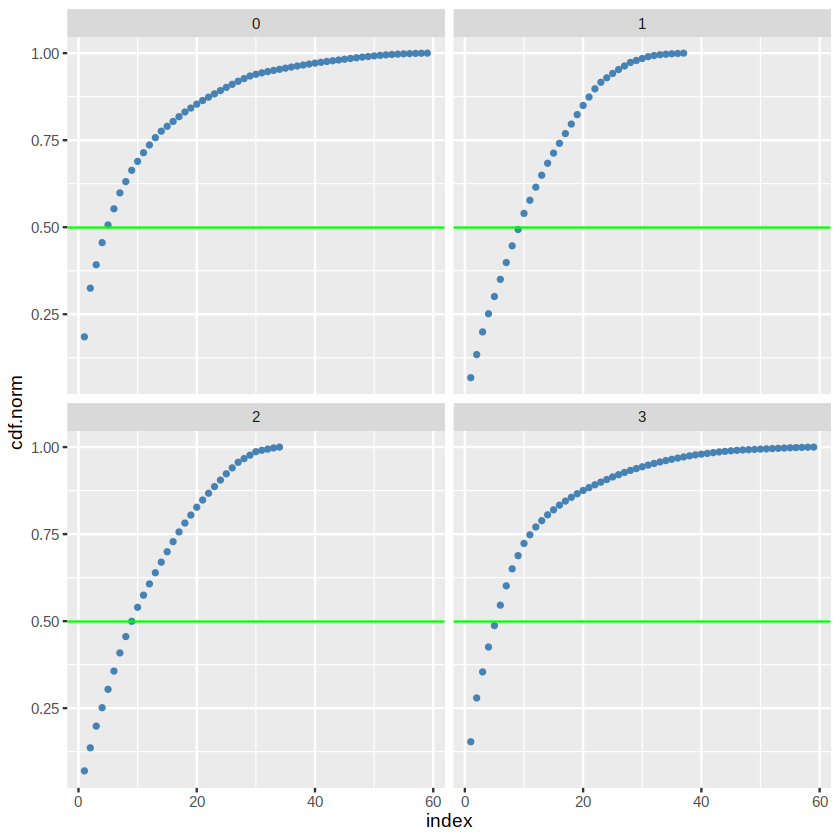

In [12]:
p <- ggplot(data = clone.sizes, aes(index, cdf.norm)) +
  geom_point(color = "steelblue", size = 1) +
  facet_wrap(~ donor) 

p <- p + geom_hline(yintercept=cdf_thresh, color='green') 
ggsave(file.path(outdir, "clones.cdf.png"))
p


In [13]:
min(clone.sizes$cdf.norm)
max(clone.sizes$cdf.norm)

[1] 0.06762887

[1] 1

In [14]:
clone.sizes

donor,lineage,norm.total,total,name,cdf.norm,cdf,index
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>
0,54,0.370039880,590,0_54,0.1850199,590,1
0,0,0.279649287,460,0_0,0.3248446,1050,2
0,2,0.134546361,229,0_2,0.3921178,1279,3
0,1,0.127061463,228,0_1,0.4556485,1507,4
0,5,0.101583485,146,0_5,0.5064402,1653,5
0,4,0.092971087,184,0_4,0.5529258,1837,6
0,3,0.091293766,179,0_3,0.5985727,2016,7
0,6,0.064917014,123,0_6,0.6310312,2139,8
0,8,0.064862765,101,0_8,0.6634626,2240,9


In [15]:
large.clones <- clone.sizes %>% filter(cdf.norm<cdf_thresh)
large.clones <- check.if.one.clone(large.clones, clone.sizes, n_top_clones)
#large.clones$name = factor(paste0(large.clones$donor,"_", large.clones$lineage))
write.csv(large.clones, 
          file=file.path(outdir, "large_clones.csv"), quote=F)

large.clones

[1] 4
[1] "i 1 donor 1"
[1] "i 2 donor 2"
[1] "i 3 donor 3"
[1] "i 4 donor 4"


donor,lineage,norm.total,total,name,cdf.norm,cdf,index
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>
0,54,0.37003988,590,0_54,0.18501994,590,1
0,0,0.27964929,460,0_0,0.32484458,1050,2
0,2,0.13454636,229,0_2,0.39211776,1279,3
0,1,0.12706146,228,0_1,0.45564850,1507,4
1,1,0.13525775,209,1_1,0.06762887,209,1
1,0,0.13289089,207,1_0,0.13407432,416,2
1,2,0.13039440,189,1_2,0.19927152,605,3
1,6,0.10412874,156,1_6,0.25133589,761,4
1,5,0.09919395,162,1_5,0.30093286,923,5


Saving 6.67 x 6.67 in image



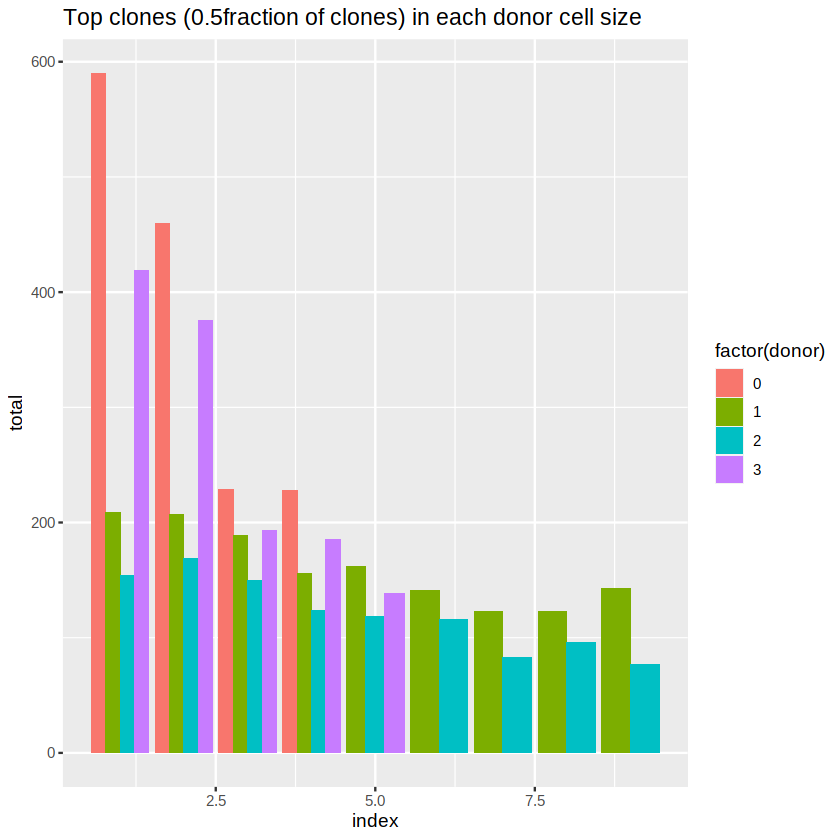

In [16]:
ggplot(data=large.clones, aes(x=index,y=total, fill = factor(donor))) + 
        geom_col(position='dodge') +
       ggtitle(paste0("Top clones (", cdf_thresh,
                      "fraction of clones) in each donor cell size"))

ggsave(file.path(outdir, "topClonesSize.png"))

## TF DE

## Filter se for cells in the large clones

In [17]:
large.clones

donor,lineage,norm.total,total,name,cdf.norm,cdf,index
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>
0,54,0.37003988,590,0_54,0.18501994,590,1
0,0,0.27964929,460,0_0,0.32484458,1050,2
0,2,0.13454636,229,0_2,0.39211776,1279,3
0,1,0.12706146,228,0_1,0.45564850,1507,4
1,1,0.13525775,209,1_1,0.06762887,209,1
1,0,0.13289089,207,1_0,0.13407432,416,2
1,2,0.13039440,189,1_2,0.19927152,605,3
1,6,0.10412874,156,1_6,0.25133589,761,4
1,5,0.09919395,162,1_5,0.30093286,923,5


In [18]:
se <- subset(se, subset= name %in% factor(large.clones$name))
se

An object of class Seurat 
170811 features across 5357 samples within 4 assays 
Active assay: chromvarnames (633 features, 0 variable features)
 3 other assays present: ATAC, RNA, chromvar
 2 dimensional reductions calculated: integrated_lsi, umap

In [19]:
saveRDS(object=se, file=file.path(outdir, "se.clonesfilt.rds"))    

## Run DE

In [20]:
# for (d in 0:(n_donors-1)){
#     print('donor')
#     print(d)
#     curr.outdir <- file.path(outdir, paste0("donor", d, "_TF"))
#     dir.create(curr.outdir)
#     donor.large.clones <- large.clones %>% filter(donor==d)
#     clones.filt.ids <- sort(donor.large.clones$lineage)
#     print('clones')
#     print(clones.filt.ids)
#     print(length(clones.filt.ids))
#     se.filt <- subset(se, subset = (donor==d) & (lineage %in% donor.large.clones$lineage))
#     Idents(se.filt) <- se.filt$lineage  
#     print('se.filt')
#     print(dim(se.filt[[]]))

#     pairs = combn(clones.filt.ids,2)
#     for (i in 1:dim(combn(clones.filt.ids,2))[2]){
#         DefaultAssay(se.filt) <- "chromvarnames"
#         print(pairs[,i])
#         try({
#             print(paste("clones", i))
#             a = pairs[1,i]
#             b = pairs[2,i]
#             da <- FindMarkers(
#               object = se.filt,
#               ident.1 = a,
#               ident.2 = b,
#               only.pos = FALSE,
#               mean.fxn = rowMeans,
#               logfc.threshold = 0.1,
#               min.pct = min_pct,
#               latent.vars=latent.vars,
#               fc.name = "avg_diff")
#             da$p_val_adj_BH <- stats::p.adjust(da$p_val, method = "BH", n = length(da$p_val))
#             write.csv(da, 
#                       file=file.path(curr.outdir, paste0("clones_",a,"__", b,".DE.TF.csv")))
#             gally <- GGally::ggpairs(da[,c("p_val", "p_val_adj")], aes(alpha = 0.4))
#             ggsave(object=gally, file=file.path(curr.outdir, paste0("clones_",a,"__", b,".DE.TF.pvalHist.png")))
#             #plotDE(se, da, c, clust_outdir)
#             # Save motifs
#             DefaultAssay(se.filt) <- "ATAC"
#             raw.ids <- names(Motifs(se.filt)@motif.names)
#             rownames(curr.tf.da) <- sapply((curr.tf.da$X), function(x){raw.ids[match(x, Motifs(se.filt)@motif.names)]})
#             m <- MotifPlot(
#               object = se.filt,
#               motifs = head(rownames(curr.tf.da)),
#               assay = 'ATAC'
#             )
#             ggsave(plot=m, 
#                        file=file.path(curr.outdir, paste0("clones_",a,"__", b,".DE.TF.motif.top.png")))




#     })
#         }
#     }